In [1]:
import os
import sys
import numpy as np
import pandas as pd
from keras.models import model_from_yaml
import tensorflow as tf
import keras.backend as K
import os

DEFER_DELETE_SIZE=int(250 * 1e6)
def create_tensorflow_session(visiblegpus):
    os.environ['CUDA_VISIBLE_DEVICES'] = str(visiblegpus)
    session_config = tf.ConfigProto()
    session_config.gpu_options.deferred_deletion_bytes = DEFER_DELETE_SIZE
    session_config.gpu_options.per_process_gpu_memory_fraction = 0.45
    session = tf.Session(config=session_config)
    K.set_session(session)
    return session
sess = create_tensorflow_session(0)

Using TensorFlow backend.
/users/manyu/anaconda3/envs/pwm_utils/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sys.path.append('/srv/scratch/manyu/NIPS_workshop_tests/motif_analysis/')

In [3]:
%load_ext autoreload
%autoreload 2
import pwm_utils

In [5]:
path_to_intervals = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/label_regions/regions_H1/newtest_DapSeq_bin200_flank400_stride200.TAIR10.intervals.bed'
path_to_labels = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/label_regions/regions_H1/newtest_DapSeq_bin200_flank400_stride200.TAIR10.labels.npy'
test_chroms_list = ['chrIV-NC_003075']
path_to_positive_intervals = 'AT5G23930/positive_intervals_test.bed'


In [81]:
f = open(path_to_positive_intervals,'w')


In [86]:
intervals_dataframe = pd.read_csv(path_to_intervals,sep = '\t',names=['chr','start','end','labels'])

In [89]:
labels = np.load(path_to_labels)

In [90]:
intervals_dataframe['labels'] = labels

In [103]:
filtered_pos_dataframe = intervals_dataframe.loc[intervals_dataframe['chr'].isin(test_chroms_list) & intervals_dataframe['labels']==1]

In [109]:
filtered_pos_dataframe.to_csv(path_to_positive_intervals,sep='\t',header=False,index=False)

In [110]:
def filter_positive_test_intervals(path_to_intervals_file,path_to_labels,test_chroms_list,path_to_positive_intervals):
    intervals_dataframe = pd.read_csv(path_to_intervals_file,sep = '\t',names=['chr','start','end','labels'])
    labels = np.load(path_to_labels)
    intervals_dataframe['labels'] = labels
    filtered_pos_dataframe = intervals_dataframe.loc[intervals_dataframe['chr'].isin(test_chroms_list) & intervals_dataframe['labels']==1]
    filtered_pos_dataframe.to_csv(path_to_positive_intervals,sep='\t',header=False,index=False)
    print("Wrote to {}".format(path_to_positive_intervals))

In [112]:
filter_positive_test_intervals(path_to_intervals,path_to_labels,test_chroms_list,path_to_positive_intervals)

Wrote to AT5G23930/positive_intervals_test.bed


In [31]:
path_to_seq_model_arch = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_models/logdir_ABI5/model.arch.yaml'
path_to_seq_model_weights = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_models/logdir_ABI5/model.weights.h5'


In [32]:
with open(path_to_seq_model_arch,'r') as f:
    model_seq = model_from_yaml(f)
model_seq.load_weights(path_to_seq_model_weights)    

In [39]:
model_seq.get_config()['input_layers']


[['data/genome_data_dir', 0, 0]]

In [7]:
from pwm_utils import pfm_counts_pipeline_seq_AC_meth_models,pfm_counts_pipeline_seq_models
from pwm_utils import plot_and_save_information_content_pwms
from pybedtools import BedTool

In [8]:
pos_intervals_bedtool = BedTool('AT5G23930/positive_intervals_test.bed')
total_len = len(pos_intervals_bedtool)
genome_path = '/srv/scratch/manyu/memmap_bcolz/genomes_dir/TAIR10.fa/'


In [10]:
total_len

811

Creating intervals list 

Reshaping Intervals and filters to use tf.nn.conv2D
All shapes are compatible:
Proceeding with convolutions:
Doing filter 0
Doing filter 1
Doing filter 2
Doing filter 3
Doing filter 4
Doing filter 5
Doing filter 6
Doing filter 7
Doing filter 8
Doing filter 9
Doing filter 10
Doing filter 11
Doing filter 12
Doing filter 13
Doing filter 14
Doing filter 15
Doing filter 16
Doing filter 17
Doing filter 18
Doing filter 19
Doing filter 20
Doing filter 21
Doing filter 22
Doing filter 23
Doing filter 24
Doing filter 25
Doing filter 26
Doing filter 27
Doing filter 28
Doing filter 29
Doing filter 30
Doing filter 31
Doing filter 32
Doing filter 33
Doing filter 34
Doing filter 35
Doing filter 36
Doing filter 37
Doing filter 38
Doing filter 39
Doing filter 40
Doing filter 41
Doing filter 42
Doing filter 43
Doing filter 44
Doing filter 45
Doing filter 46
Doing filter 47
Doing filter 48
Doing filter 49
Doing filter 50
Doing filter 51
Doing filter 52
Doing filter 53
Doing filte

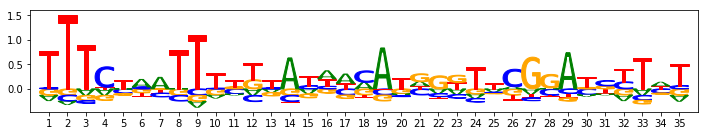

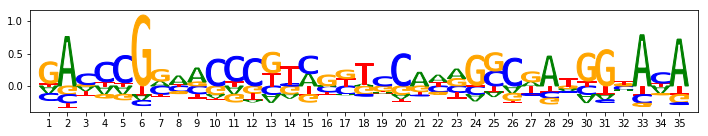

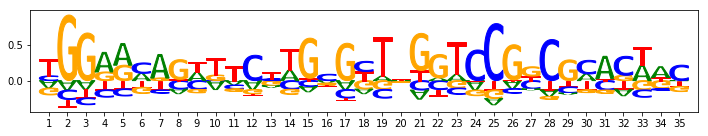

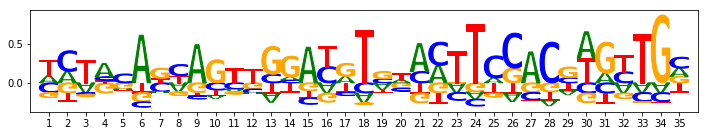

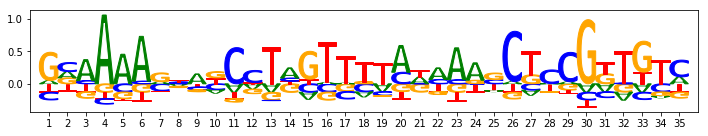

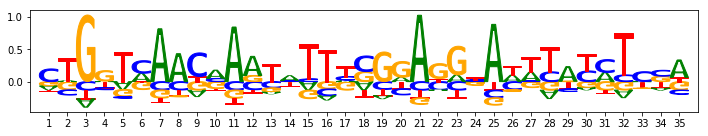

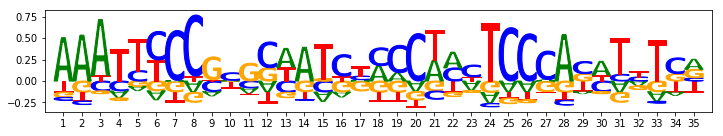

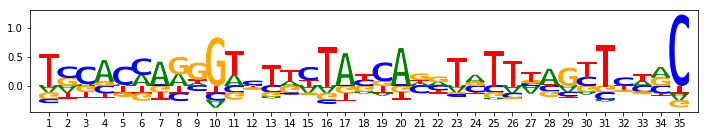

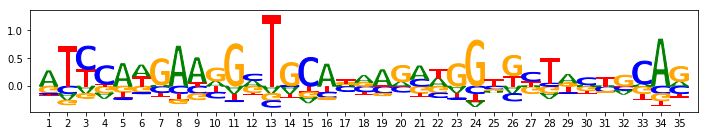

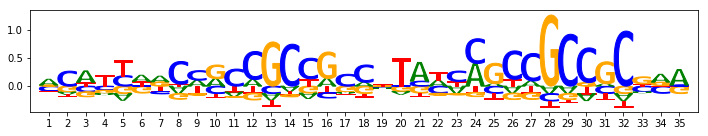

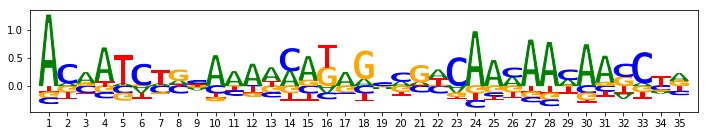

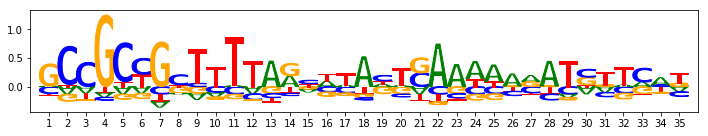

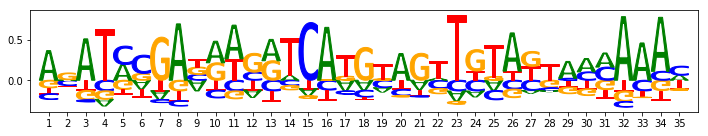

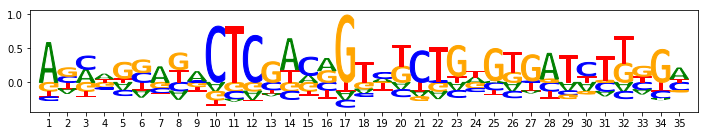

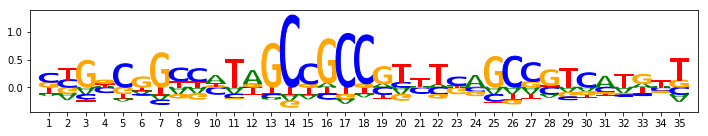

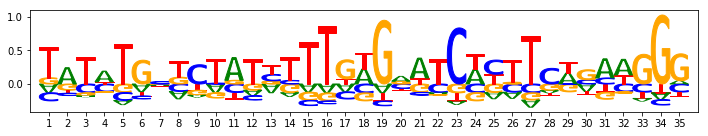

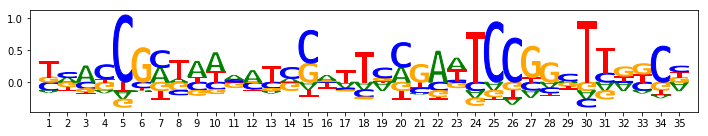

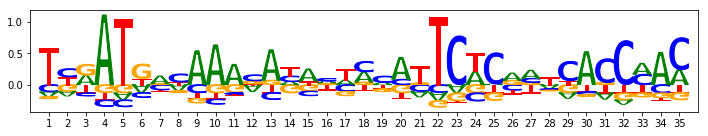

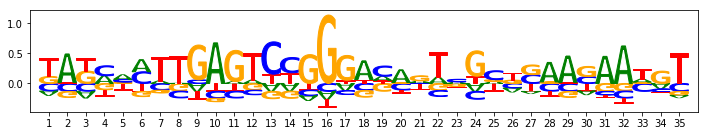

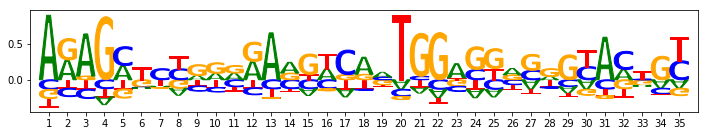

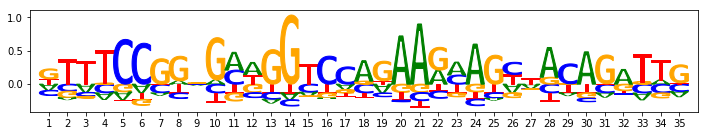

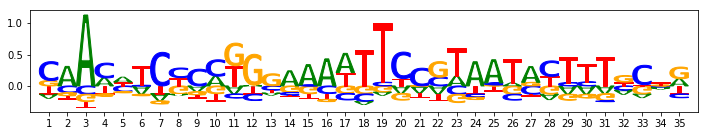

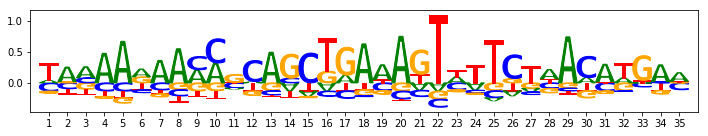

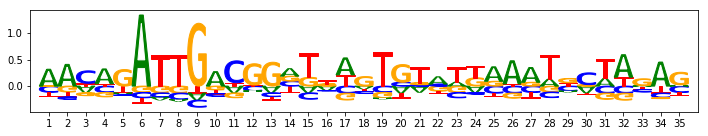

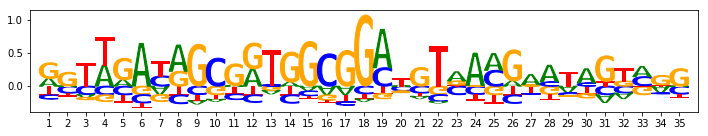

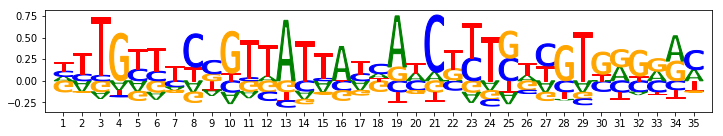

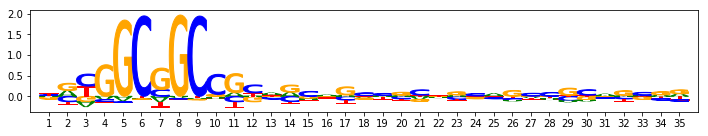

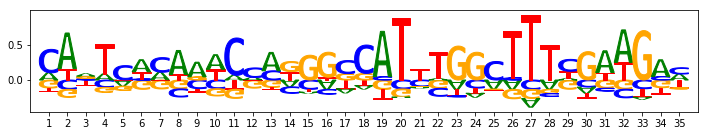

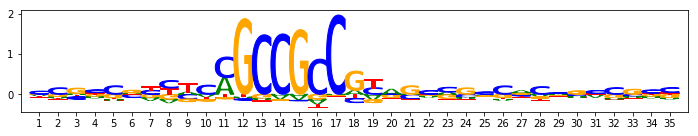

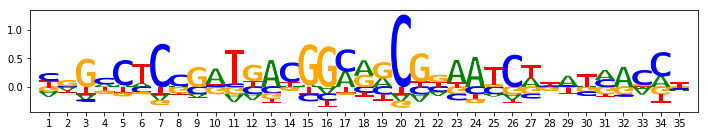

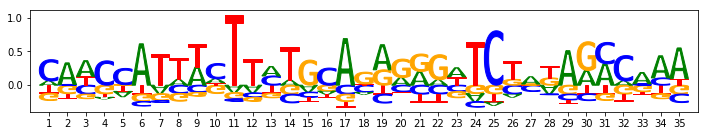

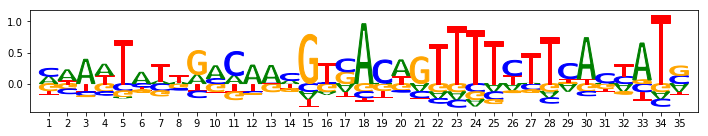

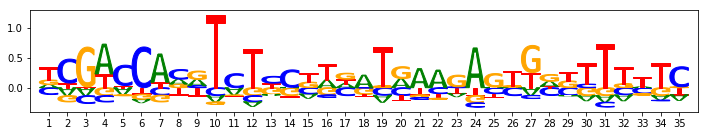

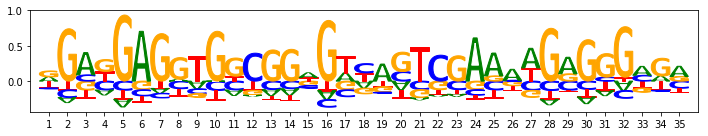

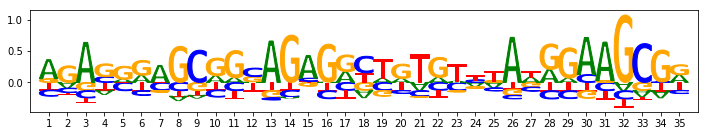

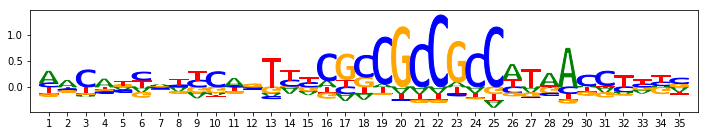

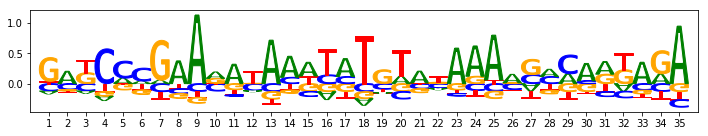

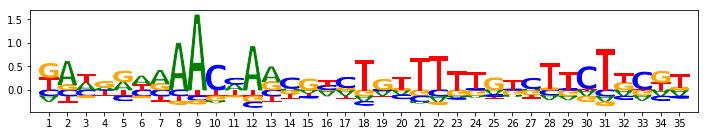

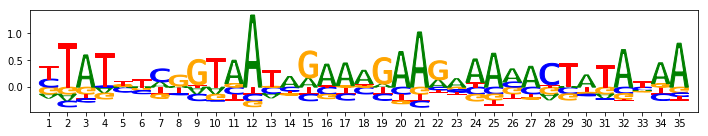

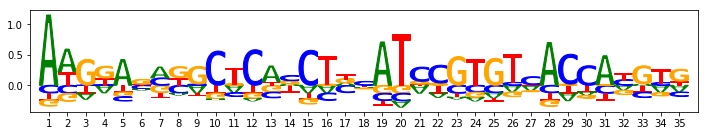

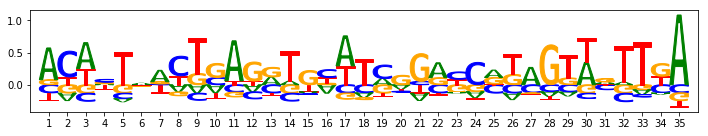

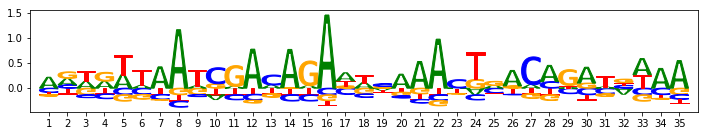

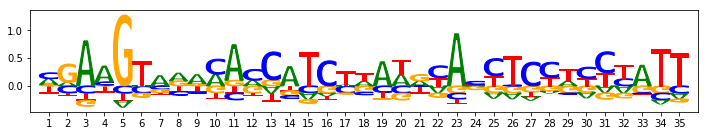

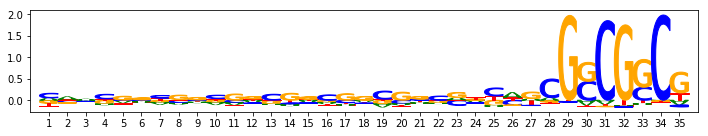

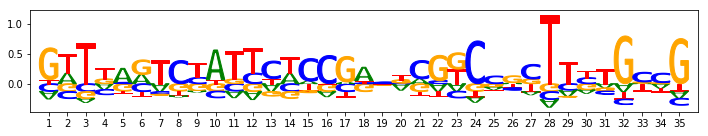

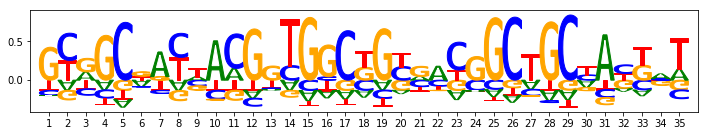

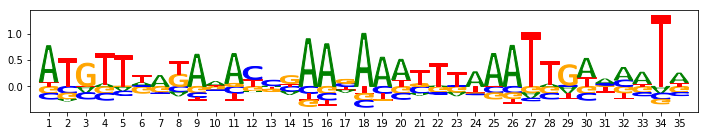

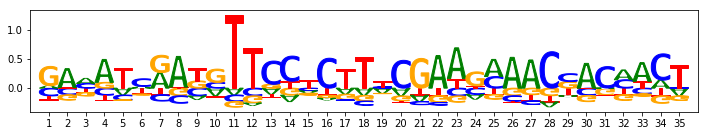

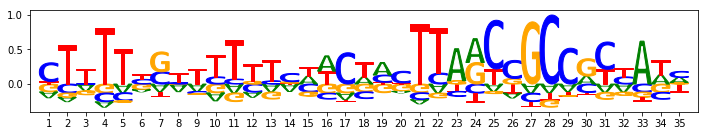

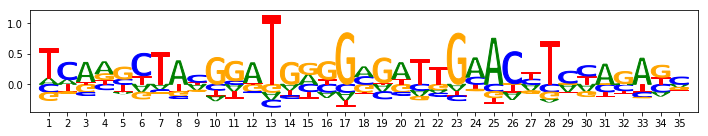

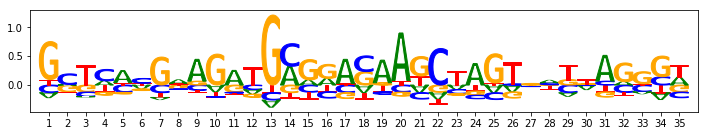

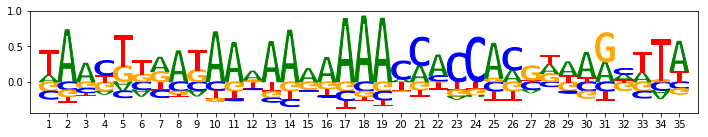

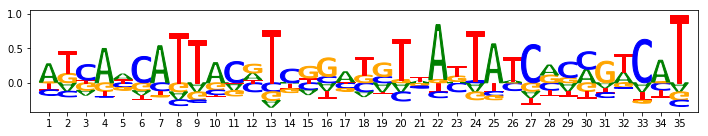

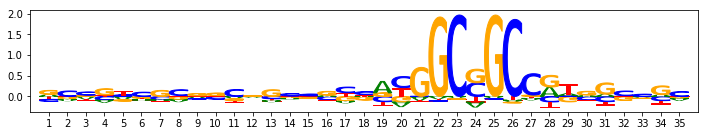

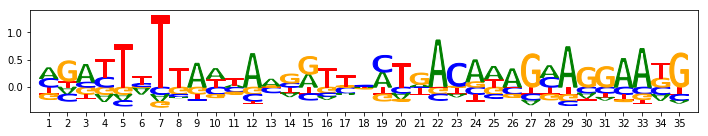

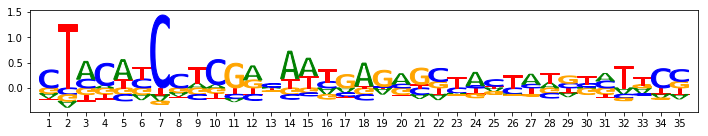

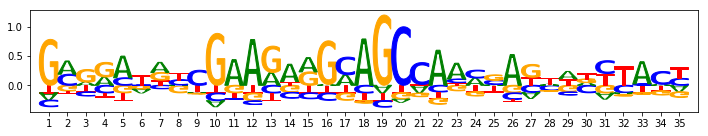

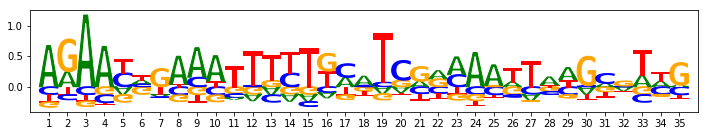

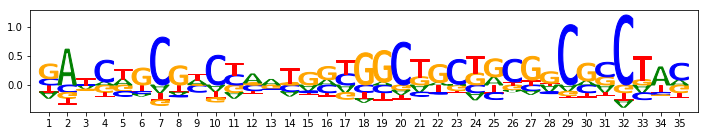

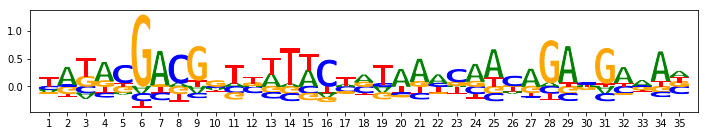

In [13]:
pfm_counts,info_list = pfm_counts_pipeline_seq_models(pos_intervals_bedtool,genome_path,model_seq,savedir='./AT5G23930/seq_only/',num_intervals=total_len)
plot_and_save_information_content_pwms('./AT5G23930/seq_only/',vocab='DNA')

In [9]:
path_to_seq_ACmeth_model_arch = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_AT5G23930_seq_methAC_revcomp_shallow_Maxpool75_stride75_numFilters60_dropout0.2/model.arch.yaml'
path_to_seq_ACmeth_model_weights = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_AT5G23930_seq_methAC_revcomp_shallow_Maxpool75_stride75_numFilters60_dropout0.2/model.weights.h5'

In [10]:
with open(path_to_seq_ACmeth_model_arch,'r') as f:
    model_seq_methAC = model_from_yaml(f)
    

IOError: [Errno 2] No such file or directory: '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_AT5G23930_seq_methAC_revcomp_shallow_Maxpool75_stride75_numFilters60_dropout0.2/model.arch.yaml'

In [40]:
model_seq_methAC.load_weights(path_to_seq_ACmeth_model_weights)

In [33]:
A_meth_path = '/srv/scratch/manyu/memmap_bcolz/methylation_dir/Arabidopsis_6mA_methylation/GSM2157793_Col_6mA_modification.normalized.renamed.bigWig/'

In [34]:
C_meth_path = '/srv/scratch/manyu/memmap_bcolz/methylation_dir/Arabidopsis_WGBS-Col-0-GSM1942127.Bismark_v0.19.0/GSM1942127.Bismark_v0.19.0.se.normalized.renamed.bigWig/'

In [6]:
# pfm_counts_pipeline_seq_AC_meth_models(pos_intervals_bedtool,genome_path,C_meth_path,A_meth_path,model_seq_methAC,
#     conv_layer_name = 'conv_layer_1',num_intervals = total_len,savedir='AT5G23930/seq_AC_meth/')
plot_and_save_information_content_pwms('./AT5G23930/seq_AC_meth/',vocab='Meth_8_channel')

NameError: name 'plot_and_save_information_content_pwms' is not defined

In [36]:
pfm_ = np.load('./AT5G23930/seq_AC_meth/pfm_counts_arr16.npy')

In [43]:
pfm_


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.27990134e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.77435258e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.38417051e-03,  1.32552405e-03,  2.54315660e-03,
         1.32014062e-02,  1.24442194e-02,  4.48685897e-03,
         4.81812796e-03,  2.25871542e-03,  7.27821407e-03,
         1.33827213e-03,  2.14755445e-03,  2.25509096e-02,
         1.03687928e-03,  3.72996302e-03,  2.54242266e-03,
         8.93

In [25]:
a={1:2}
[(p,q)] =a.items()

In [28]:
p,q

(1, 2)